Dati Leaderboard non trovati per il modello: Qwen2.5-3B-Instruct (Prompt). Assegnati valori di default (0).


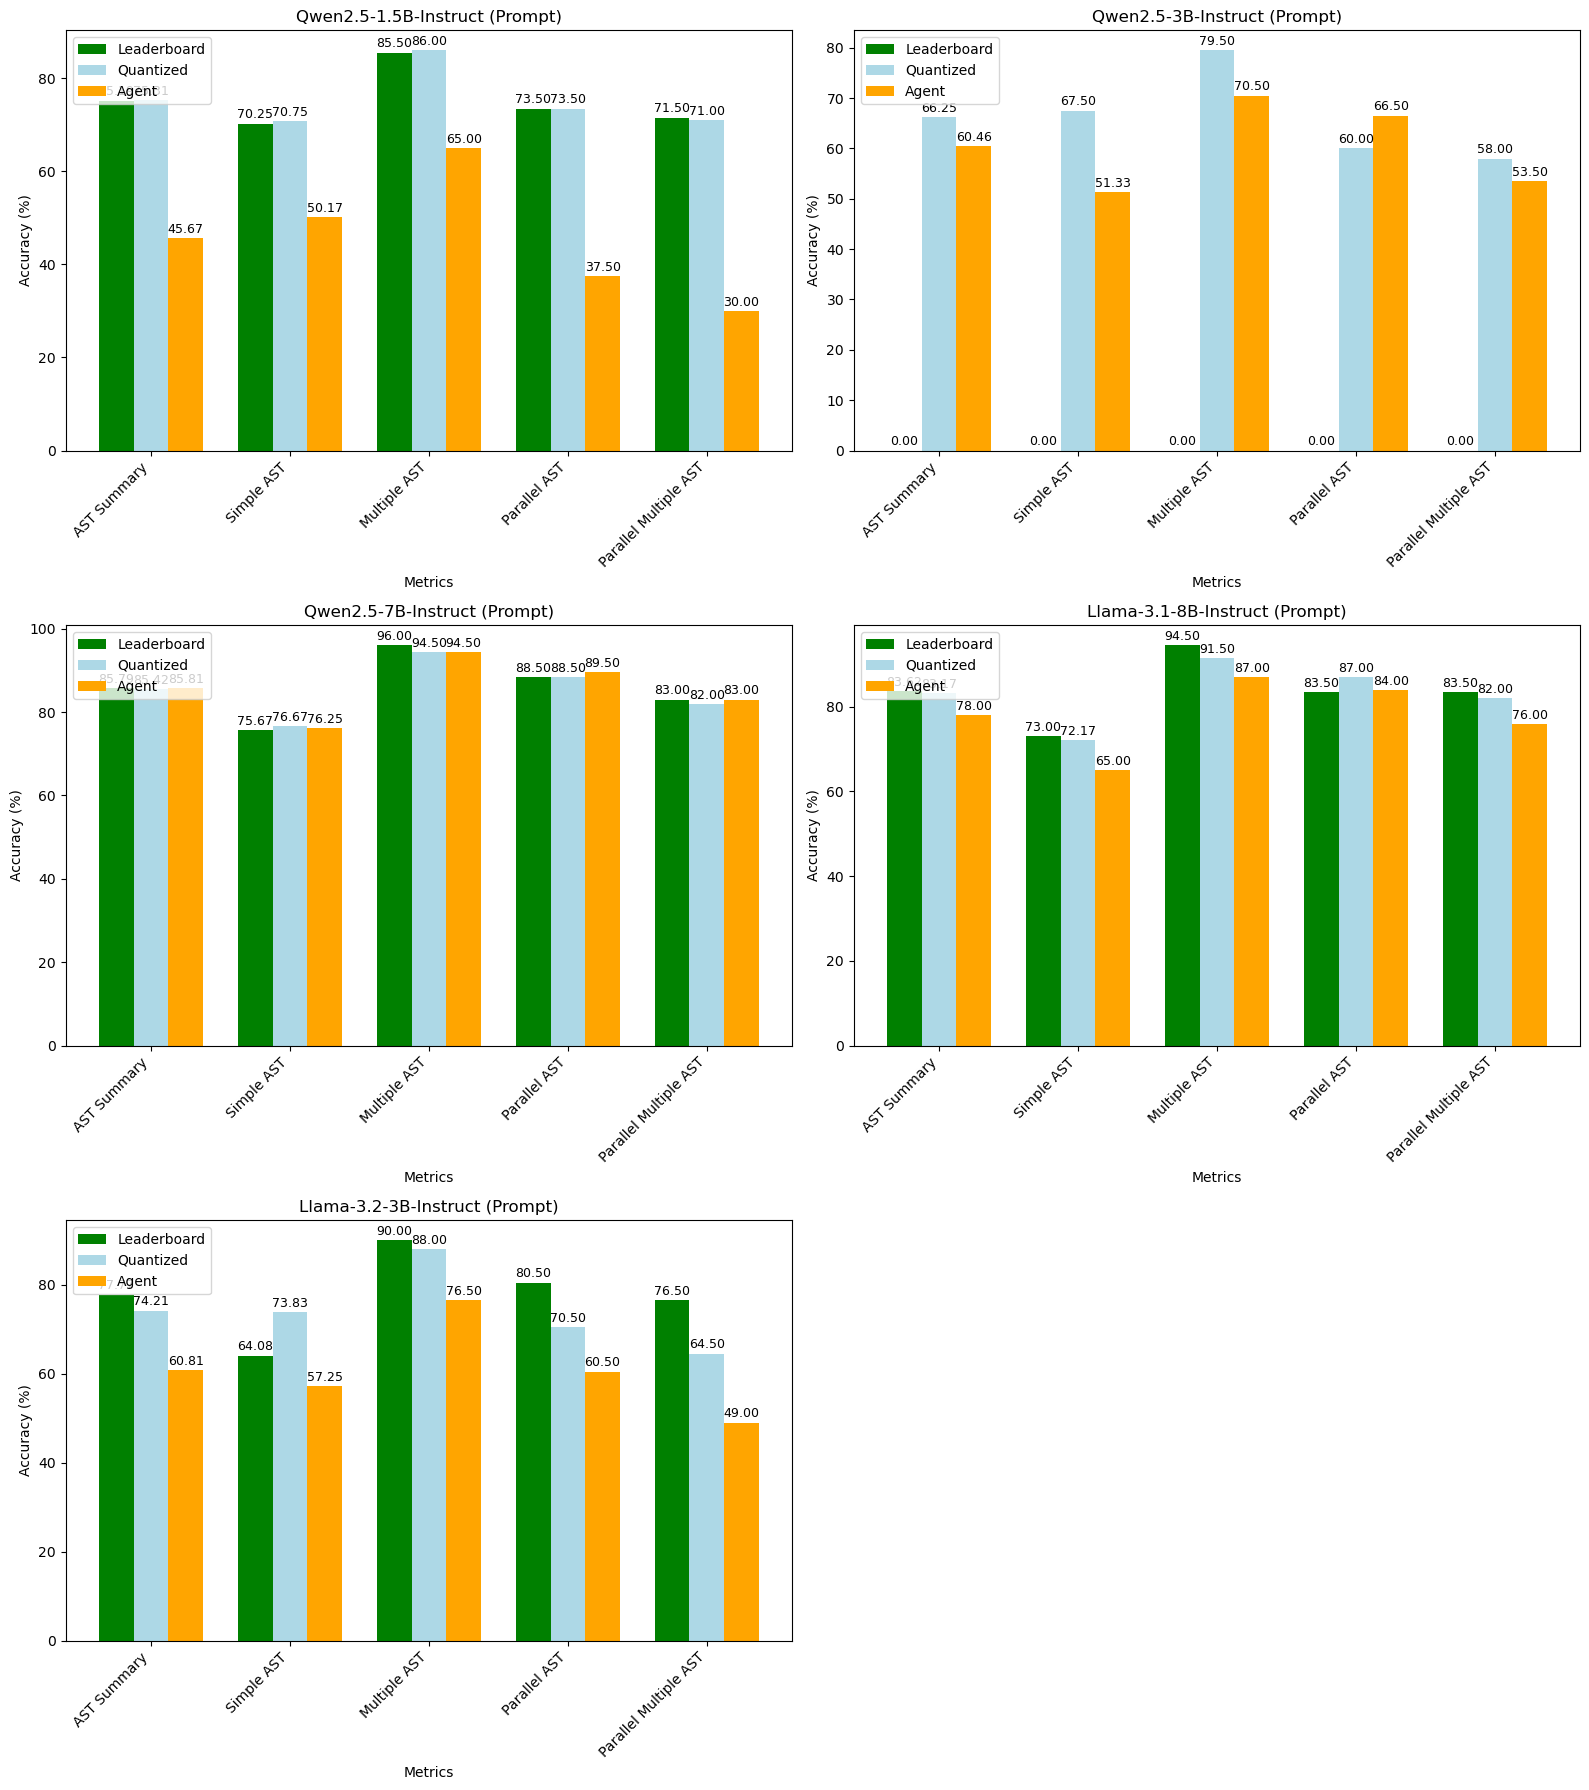

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Functions remain unchanged
def convert_to_float(value):
    if isinstance(value, str) and '%' in value:
        return float(value.strip('%'))
    try:
        return float(value)
    except ValueError:
        return 0.0

def preprocess_data(file_path):
    df = pd.read_csv(file_path)
    for column in df.columns[2:]:
        df[column] = df[column].apply(convert_to_float)
    return df

def standardize_leaderboard_metrics(df, metric_mapping):
    return df.rename(columns=metric_mapping)

def create_bar_chart_for_model(ax, quantized_data, agent_data, leaderboard_data, metrics, bar_width, model_name, show_agent):
    x = np.arange(len(metrics))

    if leaderboard_data is not None:
        bars = ax.bar(x - bar_width, leaderboard_data, bar_width, color='green', label='Leaderboard')
        for i, value in enumerate(leaderboard_data):
            ax.text(x[i] - bar_width, value + 0.5, f'{value:.2f}', ha='center', va='bottom', fontsize=9)

    bars = ax.bar(x, quantized_data, bar_width, color='lightblue', label='Quantized')
    for i, value in enumerate(quantized_data):
        ax.text(x[i], value + 0.5, f'{value:.2f}', ha='center', va='bottom', fontsize=9)

    if show_agent and agent_data is not None:
        bars = ax.bar(x + bar_width, agent_data, bar_width, color='orange', label='Agent')
        for i, value in enumerate(agent_data):
            ax.text(x[i] + bar_width, value + 0.5, f'{value:.2f}', ha='center', va='bottom', fontsize=9)

    ax.set_xlabel('Metrics')
    ax.set_ylabel('Accuracy (%)')
    ax.set_title(model_name)
    ax.set_xticks(x)
    ax.set_xticklabels(metrics, rotation=45, ha='right')
    ax.legend(loc='upper left')

def extract_model_data(df, model_name, metrics):
    model_data = df.loc[df['Model'] == model_name, metrics]
    if not model_data.empty:
        return model_data.values.flatten()
    return None

# File paths and preprocessing remain unchanged
quantize_file = '/home/ago/giammy/TESI-MAGISTRALE/thesis/data/score-quantize/data_non_live.csv'
agent_file = '/home/ago/giammy/TESI-MAGISTRALE/thesis/data/score-agent-v003/data_non_live.csv'
leaderboard_file = 'leaderboard.csv'

df_quantize = preprocess_data(quantize_file)
df_agent = preprocess_data(agent_file)
df_leaderboard = pd.read_csv(leaderboard_file)

metric_mapping = {
    'AST Summary': 'AST Summary',
    'Simple': 'Simple AST',
    'Multiple': 'Multiple AST',
    'Parallel': 'Parallel AST',
    'Multiple Parallel': 'Parallel Multiple AST'
}
df_leaderboard = standardize_leaderboard_metrics(df_leaderboard, metric_mapping)

metrics = ['AST Summary', 'Simple AST', 'Multiple AST', 'Parallel AST', 'Parallel Multiple AST']
models = [
    'Qwen2.5-1.5B-Instruct (Prompt)',
    'Qwen2.5-3B-Instruct (Prompt)',
    'Qwen2.5-7B-Instruct (Prompt)',
    'Llama-3.1-8B-Instruct (Prompt)',
    'Llama-3.2-3B-Instruct (Prompt)'
]

bar_width = 0.25
show_agent = True

# Create a 3x2 grid for the subplots
fig, axes = plt.subplots(3, 2, figsize=(16, 18))  # Adjust figsize as needed

# Flatten axes for easy indexing
axes = axes.flatten()

# Create charts for each model
for i, model in enumerate(models):
    quantized_data = extract_model_data(df_quantize, model, metrics)
    agent_data = extract_model_data(df_agent, model, metrics)
    leaderboard_data = extract_model_data(df_leaderboard, model, metrics)
    
    if agent_data is None:
        agent_data = np.zeros(len(metrics))
        print(f"Dati Agent non trovati per il modello: {model}. Assegnati valori di default (0).")
    
    if quantized_data is None:
        quantized_data = np.zeros(len(metrics))
        print(f"Dati Quantized non trovati per il modello: {model}. Assegnati valori di default (0).")
    
    if leaderboard_data is None:
        leaderboard_data = np.zeros(len(metrics))
        print(f"Dati Leaderboard non trovati per il modello: {model}. Assegnati valori di default (0).")
    
    create_bar_chart_for_model(axes[i], quantized_data, agent_data, leaderboard_data, metrics, bar_width, model, show_agent)

# Remove the last subplot (6th plot) if unnecessary
if len(models) < len(axes):
    for j in range(len(models), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

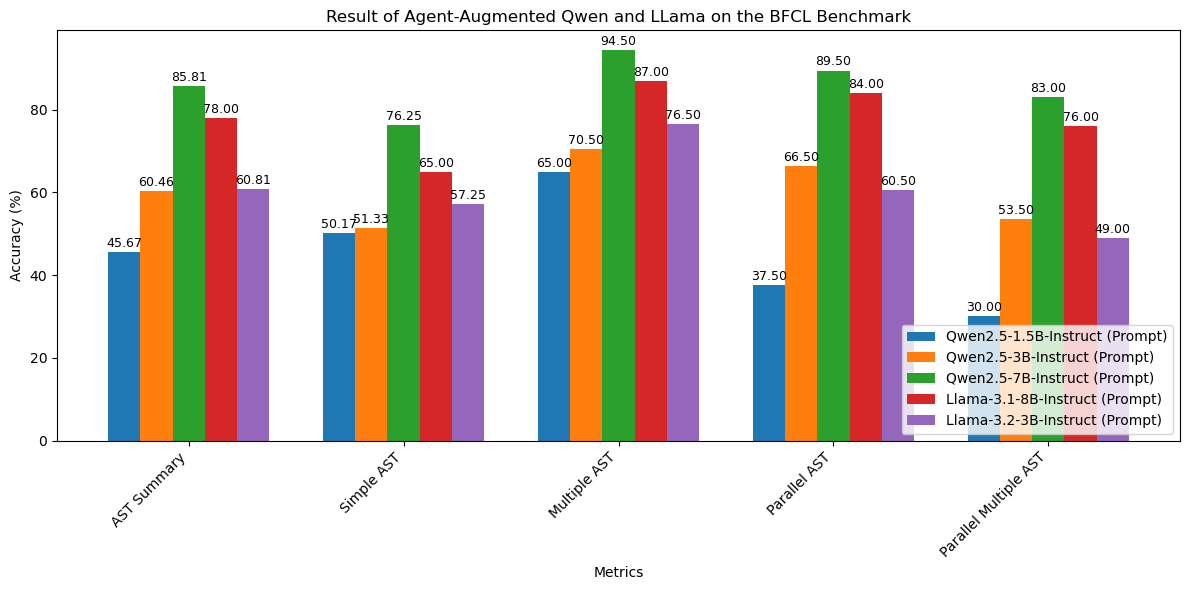

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Functions remain unchanged
def convert_to_float(value):
    if isinstance(value, str) and '%' in value:
        return float(value.strip('%'))
    try:
        return float(value)
    except ValueError:
        return 0.0

def preprocess_data(file_path):
    df = pd.read_csv(file_path)
    for column in df.columns[2:]:
        df[column] = df[column].apply(convert_to_float)
    return df

def standardize_leaderboard_metrics(df, metric_mapping):
    return df.rename(columns=metric_mapping)

def extract_model_data(df, model_name, metrics):
    model_data = df.loc[df['Model'] == model_name, metrics]
    if not model_data.empty:
        return model_data.values.flatten()
    return None

# File paths and preprocessing
file = '/home/ago/giammy/TESI-MAGISTRALE/thesis/data/score-quantize/data_non_live.csv'
file = '/home/ago/giammy/TESI-MAGISTRALE/thesis/data/score-agent-v003/data_non_live.csv'
df_quantize = preprocess_data(file)

metrics = ['AST Summary', 'Simple AST', 'Multiple AST', 'Parallel AST', 'Parallel Multiple AST']
models = [
    'Qwen2.5-1.5B-Instruct (Prompt)',
    'Qwen2.5-3B-Instruct (Prompt)',
    'Qwen2.5-7B-Instruct (Prompt)',
    'Llama-3.1-8B-Instruct (Prompt)',
    'Llama-3.2-3B-Instruct (Prompt)'
]

bar_width = 0.15
x = np.arange(len(metrics))

# Prepare data for all models
quantized_data_all = []
for model in models:
    quantized_data = extract_model_data(df_quantize, model, metrics)
    if quantized_data is None:
        quantized_data = np.zeros(len(metrics))
        print(f"Dati Quantized non trovati per il modello: {model}. Assegnati valori di default (0).")
    quantized_data_all.append(quantized_data)

# Plot combined histogram
fig, ax = plt.subplots(figsize=(12, 6))

for i, model_data in enumerate(quantized_data_all):
    bars = ax.bar(x + i * bar_width, model_data, bar_width, label=models[i])
    for bar in bars:
        height = bar.get_height()
        if height > 0:  # Only display values above 0
            ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{height:.2f}', ha='center', va='bottom', fontsize=9)

# Customize the plot
ax.set_xlabel('Metrics')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Result of Agent-Augmented Qwen and LLama on the BFCL Benchmark')
ax.set_xticks(x + (len(models) - 1) * bar_width / 2)
ax.set_xticklabels(metrics, rotation=45, ha='right')
ax.legend(loc='lower right')

plt.tight_layout()
plt.show()


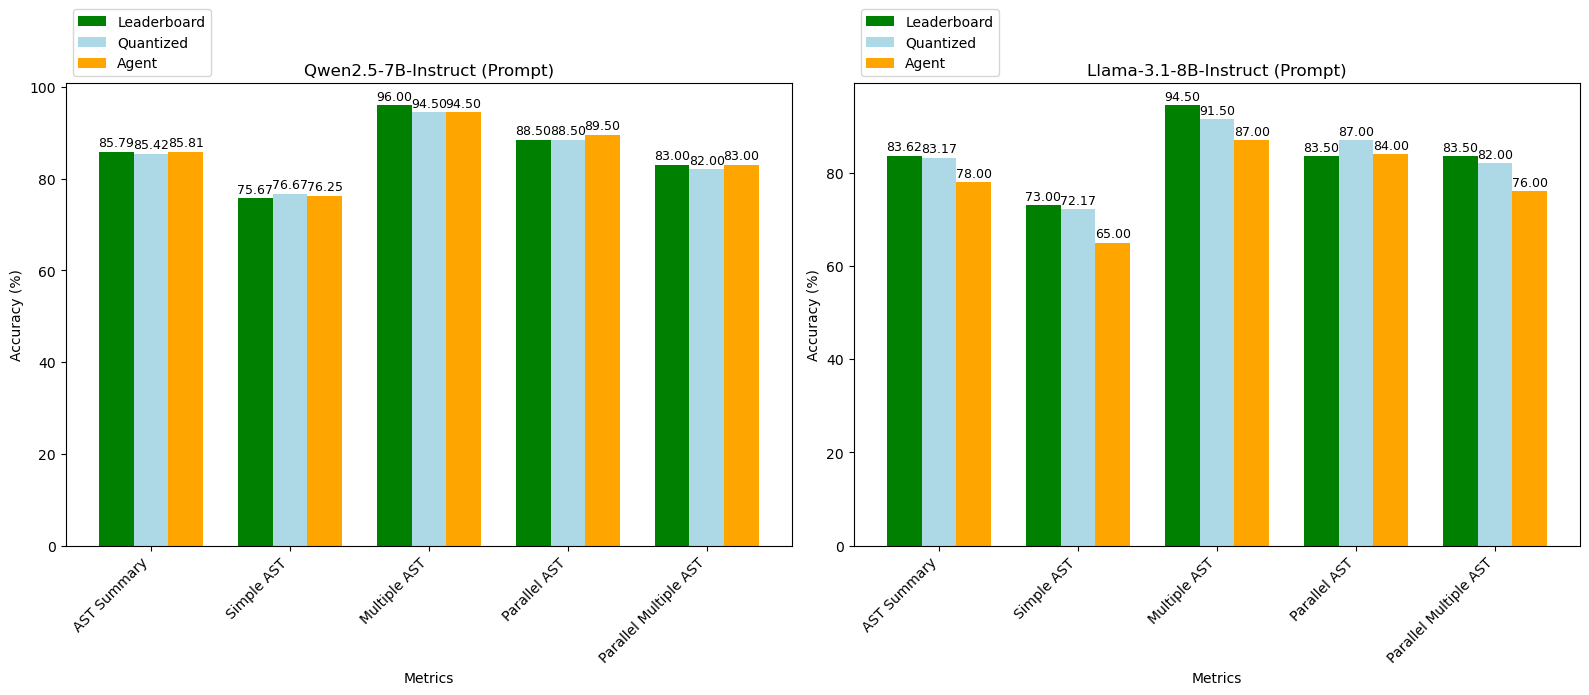

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Functions remain unchanged
def convert_to_float(value):
    if isinstance(value, str) and '%' in value:
        return float(value.strip('%'))
    try:
        return float(value)
    except ValueError:
        return 0.0

def preprocess_data(file_path):
    df = pd.read_csv(file_path)
    for column in df.columns[2:]:
        df[column] = df[column].apply(convert_to_float)
    return df

def standardize_leaderboard_metrics(df, metric_mapping):
    return df.rename(columns=metric_mapping)

def create_bar_chart_for_model(ax, quantized_data, agent_data, leaderboard_data, metrics, bar_width, model_name, show_agent):
    x = np.arange(len(metrics))

    if leaderboard_data is not None:
        bars = ax.bar(x - bar_width, leaderboard_data, bar_width, color='green', label='Leaderboard')
        for i, value in enumerate(leaderboard_data):
            ax.text(x[i] - bar_width, value + 0.5, f'{value:.2f}', ha='center', va='bottom', fontsize=9)

    bars = ax.bar(x, quantized_data, bar_width, color='lightblue', label='Quantized')
    for i, value in enumerate(quantized_data):
        ax.text(x[i], value + 0.5, f'{value:.2f}', ha='center', va='bottom', fontsize=9)

    if show_agent and agent_data is not None:
        bars = ax.bar(x + bar_width, agent_data, bar_width, color='orange', label='Agent')
        for i, value in enumerate(agent_data):
            ax.text(x[i] + bar_width, value + 0.5, f'{value:.2f}', ha='center', va='bottom', fontsize=9)

    ax.set_xlabel('Metrics')
    ax.set_ylabel('Accuracy (%)')
    ax.set_title(model_name)
    ax.set_xticks(x)
    ax.set_xticklabels(metrics, rotation=45, ha='right')
    
    # Updated legend positioning
    ax.legend(loc='lower left', bbox_to_anchor=(0, 1), frameon=True)

def extract_model_data(df, model_name, metrics):
    model_data = df.loc[df['Model'] == model_name, metrics]
    if not model_data.empty:
        return model_data.values.flatten()
    return None

# File paths and preprocessing remain unchanged
quantize_file = '/home/ago/giammy/TESI-MAGISTRALE/thesis/data/score-quantize/data_non_live.csv'
agent_file = '/home/ago/giammy/TESI-MAGISTRALE/thesis/data/score-agent-v003/data_non_live.csv'
leaderboard_file = 'leaderboard.csv'

df_quantize = preprocess_data(quantize_file)
df_agent = preprocess_data(agent_file)
df_leaderboard = pd.read_csv(leaderboard_file)

metric_mapping = {
    'AST Summary': 'AST Summary',
    'Simple': 'Simple AST',
    'Multiple': 'Multiple AST',
    'Parallel': 'Parallel AST',
    'Multiple Parallel': 'Parallel Multiple AST'
}
df_leaderboard = standardize_leaderboard_metrics(df_leaderboard, metric_mapping)

metrics = ['AST Summary', 'Simple AST', 'Multiple AST', 'Parallel AST', 'Parallel Multiple AST']
models = [
    'Qwen2.5-7B-Instruct (Prompt)',
    'Llama-3.1-8B-Instruct (Prompt)',
]

bar_width = 0.25
show_agent = True

# Create a 3x2 grid for the subplots
fig, axes = plt.subplots(3, 2, figsize=(16, 18))  # Adjust figsize as needed

# Flatten axes for easy indexing
axes = axes.flatten()

# Create charts for each model
for i, model in enumerate(models):
    quantized_data = extract_model_data(df_quantize, model, metrics)
    agent_data = extract_model_data(df_agent, model, metrics)
    leaderboard_data = extract_model_data(df_leaderboard, model, metrics)
    
    if agent_data is None:
        agent_data = np.zeros(len(metrics))
        print(f"Dati Agent non trovati per il modello: {model}. Assegnati valori di default (0).")
    
    if quantized_data is None:
        quantized_data = np.zeros(len(metrics))
        print(f"Dati Quantized non trovati per il modello: {model}. Assegnati valori di default (0).")
    
    if leaderboard_data is None:
        leaderboard_data = np.zeros(len(metrics))
        print(f"Dati Leaderboard non trovati per il modello: {model}. Assegnati valori di default (0).")
    
    create_bar_chart_for_model(axes[i], quantized_data, agent_data, leaderboard_data, metrics, bar_width, model, show_agent)

# Remove the last subplot (6th plot) if unnecessary
if len(models) < len(axes):
    for j in range(len(models), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()